<a href="https://colab.research.google.com/github/chaitanyadeepikap/TEXT-CLASSIFICATION/blob/main/AITT_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5812 - loss: 0.6892 - val_accuracy: 0.5437 - val_loss: 0.6647
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6339 - loss: 0.6661 - val_accuracy: 0.6750 - val_loss: 0.6166
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8544 - loss: 0.6116 - val_accuracy: 0.9563 - val_loss: 0.5227
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9506 - loss: 0.4988 - val_accuracy: 1.0000 - val_loss: 0.3691
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9806 - loss: 0.3441 - val_accuracy: 1.0000 - val_loss: 0.2386
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.2185 - val_accuracy: 1.0000 - val_loss: 0.1478
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1343 - val_accuracy: 1.0000 - val_loss: 0.0924
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 1.0000 - val_loss: 0.060

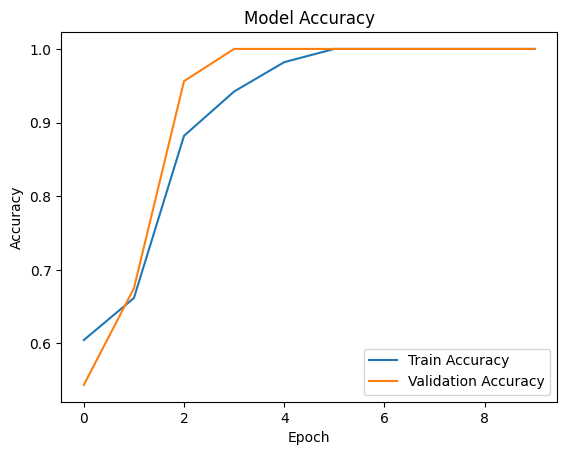

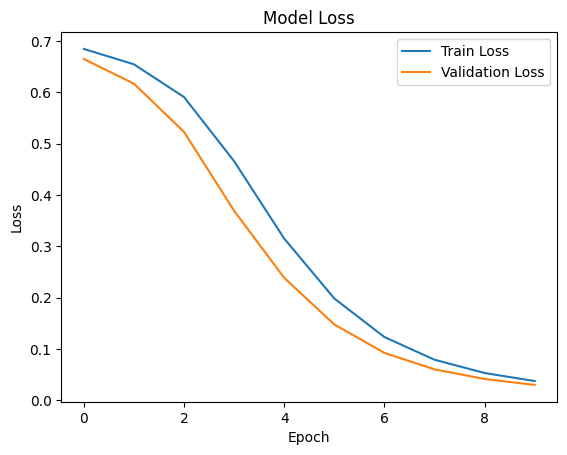

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0304  
Test accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Review: 'I loved this movie!'
Raw Prediction Confidence: 0.9623
Predicted Sentiment: Positive

Review: 'It was a bad film.'
Raw Prediction Confidence: 0.0230
Predicted Sentiment: Negative

Review: 'What a fantastic experience!'
Raw Prediction Confidence: 0.9934
Predicted Sentiment: Positive

Review: 'I didn't enjoy it at all.'
Raw Prediction Confidence: 0.6800
Predicted Sentiment: Positive



In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import random

# Seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
def generate_reviews(num_samples=1000):
    positive_reviews = [
        "I loved this movie!", "What a fantastic experience!", "Absolutely brilliant!",
        "The cast was amazing!", "I would watch it again!", "This is a must-see!",
        "Incredible storyline and characters!", "Such a heartwarming film!",
        "Fantastic direction and cinematography!", "I can't recommend it enough!"
    ]

    negative_reviews = [
        "It was a bad film.", "I hated this movie.", "Absolutely terrible!",
        "The cast was awful!", "I would never watch it again.",
        "This is not worth your time!", "The storyline was boring.",
        "Such a disappointing experience.", "Poorly directed and acted.",
        "I wouldn't recommend this to anyone."
    ]

    reviews = []
    labels = []

    for _ in range(num_samples // 2):
        reviews.append(random.choice(positive_reviews))
        labels.append(1)  # Positive label
        reviews.append(random.choice(negative_reviews))
        labels.append(0)  # Negative label

    return reviews, labels

# Generate a dataset
num_samples = 2000
x_data, y_data = generate_reviews(num_samples)

# Convert to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# Define parameters for vectorization
vocab_size = 10000  # Adjust based on your needs
max_length = 20     # Maximum length of input sequences

# Create and fit the vectorization layer
vectorize_layer = layers.TextVectorization(max_tokens=vocab_size, output_sequence_length=max_length)
vectorize_layer.adapt(x_train)

# Build a simple neural network model
model = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    vectorize_layer(x_train), y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(vectorize_layer(x_test), y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Testing the model with synthetic examples
test_samples = tf.constant([
    "I loved this movie!",  # Positive
    "It was a bad film.",   # Negative
    "What a fantastic experience!",  # Positive
    "I didn't enjoy it at all."  # Negative
])

# Predict sentiment on known samples
predictions = model.predict(vectorize_layer(test_samples))

# Display predictions
for review, prediction in zip(test_samples, predictions):
    sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
    print(f"Review: '{review.numpy().decode('utf-8')}'")
    print(f"Raw Prediction Confidence: {prediction[0]:.4f}")
    print(f"Predicted Sentiment: {sentiment}\n")
